In [1]:
import numpy as np
from glob import glob
import pandas as pd
import json

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# CIFAR-5000: Distribution of gradients vs epochs

In [2]:
mixup_path_list = sorted(glob('../experiments/test_mixup_ema/cifar10.1@5000-1/*/gradients_*.txt'))

tmp = []
for ind, path in enumerate(mixup_path_list):
    f = json.load(open(path, "r"))
    df = pd.DataFrame(f)
    df.columns=['epoch_{}'.format((ind+1)*10)]
    tmp.append(df)
mixup_df = pd.concat(tmp, axis=1)  

proposed_path_list = sorted(glob('../experiments/test_l2_ema/cifar10.1@5000-1/*/gradients_*.txt'))

tmp = []
for ind, path in enumerate(proposed_path_list):
    f = json.load(open(path, "r"))
    df = pd.DataFrame(f)
    df.columns=['epoch_{}'.format((ind+1)*10)]
    tmp.append(df)
proposed_df = pd.concat(tmp, axis=1)   

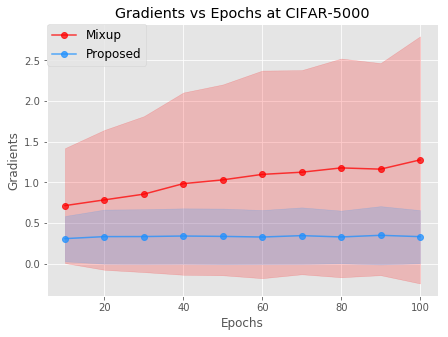

In [3]:
colors=['red', 'dodgerblue']
df_list=[mixup_df, proposed_df]
names=['Mixup','Proposed']

plt.figure(figsize=(7,5))
for i in range(len(colors)):
    ymean, yerr = df_list[i].mean(), df_list[i].std()
    x_list = np.linspace(10,100, 10)
    plt.plot(x_list, ymean, marker='o', color=colors[i], label=names[i], alpha=0.75) 
    plt.fill_between(x_list, ymean-yerr, ymean+yerr, alpha=0.2, edgecolor=colors[i], facecolor=colors[i])

plt.legend(loc='upper left', borderaxespad=0., fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Gradients')
plt.title('Gradients vs Epochs at CIFAR-5000')
plt.savefig('figures/cifar5000_grad_vs_epoch.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

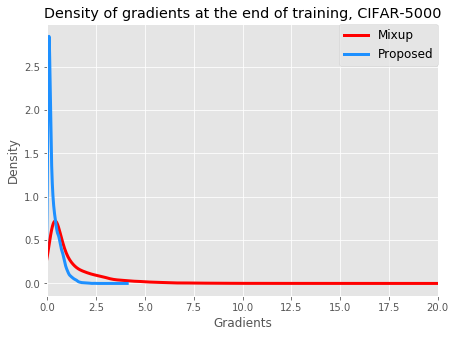

In [4]:
plt.figure(figsize=(7,5))
mixup_df['epoch_100'].plot.density(c=colors[0], label=names[0], linewidth=3)
proposed_df['epoch_100'].plot.density(c=colors[1], label=names[1], linewidth=3)
plt.xlim(0, 20)
plt.legend(loc='upper right', borderaxespad=0., fontsize=12)
plt.xlabel('Gradients')
plt.ylabel('Density')
plt.title('Density of gradients at the end of training, CIFAR-5000')
plt.savefig('figures/cifar5000_density.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

# CIFAR-50000: Distribution of gradients vs epochs

In [5]:
mixup_path_list = sorted(glob('../experiments/test_mixup_ema/cifar10.1@50000-1/*/gradients_*.txt'))

tmp = []
for ind, path in enumerate(mixup_path_list):
    f = json.load(open(path, "r"))
    df = pd.DataFrame(f)
    df.columns=['epoch_{}'.format((ind+1)*10)]
    tmp.append(df)
mixup_df = pd.concat(tmp, axis=1)  

proposed_path_list = sorted(glob('../experiments/test_l2_ema/cifar10.1@50000-1/*/gradients_*.txt'))

tmp = []
for ind, path in enumerate(proposed_path_list):
    f = json.load(open(path, "r"))
    df = pd.DataFrame(f)
    df.columns=['epoch_{}'.format((ind+1)*10)]
    tmp.append(df)
proposed_df = pd.concat(tmp, axis=1)   

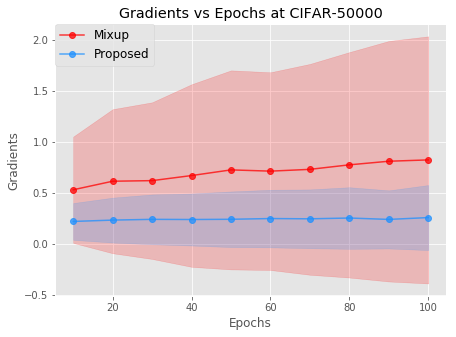

In [6]:
colors=['red', 'dodgerblue']
df_list=[mixup_df, proposed_df]
names=['Mixup','Proposed']

plt.figure(figsize=(7,5))
for i in range(len(colors)):
    ymean, yerr = df_list[i].mean(), df_list[i].std()
    x_list = np.linspace(10,100, 10)
    plt.plot(x_list, ymean, marker='o', color=colors[i], label=names[i], alpha=0.75) 
    plt.fill_between(x_list, ymean-yerr, ymean+yerr, alpha=0.2, edgecolor=colors[i], facecolor=colors[i])

plt.legend(loc='upper left', borderaxespad=0., fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Gradients')
plt.title('Gradients vs Epochs at CIFAR-50000')
plt.savefig('figures/cifar50000_grad_vs_epoch.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

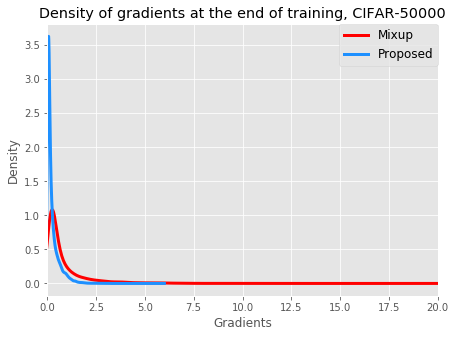

In [7]:
plt.figure(figsize=(7,5))
mixup_df['epoch_100'].plot.density(c=colors[0], label=names[0], linewidth=3)
proposed_df['epoch_100'].plot.density(c=colors[1], label=names[1], linewidth=3)
plt.xlim(0, 20)
plt.legend(loc='upper right', borderaxespad=0., fontsize=12)
plt.xlabel('Gradients')
plt.ylabel('Density')
plt.title('Density of gradients at the end of training, CIFAR-50000')
plt.savefig('figures/cifar50000_density.pdf', dpi=300, bbox_inches='tight', pad_inches=0)